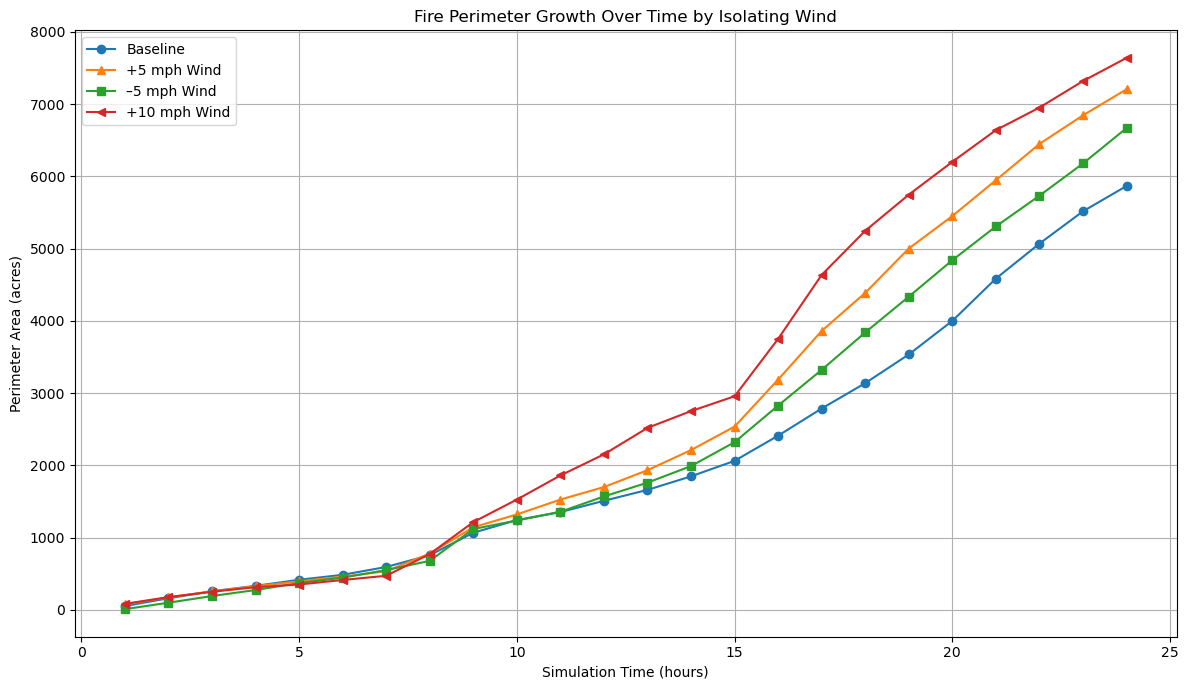

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
baseline_path = 'Baseline_Perimeter_CSV.csv'
high_path = '+5_Non_Averaged_Perimeters.csv'
low_path = '-5_Non_Averaged_Perimeters.csv'
higher_path = '+10_Wind_Speed.csv' 

# Load data
df_base = pd.read_csv(baseline_path)
df_high = pd.read_csv(high_path)
df_low = pd.read_csv(low_path)
df_higher = pd.read_csv(higher_path)

# Drop rows with 0 perimeter area
df_base = df_base[df_base['Acres'] != 0]
df_high = df_high[df_high['Acres'] != 0]
df_low = df_low[df_low['Acres'] != 0]
df_higher = df_higher[df_higher['Acres'] != 0]

# Convert SimTime from minutes to hours
df_base['SimHours'] = df_base['SimTime'] / 60
df_high['SimHours'] = df_high['SimTime'] / 60
df_low['SimHours'] = df_low['SimTime'] / 60
df_higher['SimHours'] = df_higher['SimTime'] / 60

# Plot all three scenarios
plt.figure(figsize=(12, 7))
plt.plot(df_base['SimHours'], df_base['Acres'], label='Baseline', marker='o')
plt.plot(df_high['SimHours'], df_high['Acres'], label='+5 mph Wind', marker='^')
plt.plot(df_low['SimHours'], df_low['Acres'], label='–5 mph Wind', marker='s')
plt.plot(df_higher['SimHours'], df_higher['Acres'], label= '+10 mph Wind', marker = '<')

# Chart formatting
plt.title('Fire Perimeter Growth Over Time by Isolating Wind')
plt.xlabel('Simulation Time (hours)')
plt.ylabel('Perimeter Area (acres)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





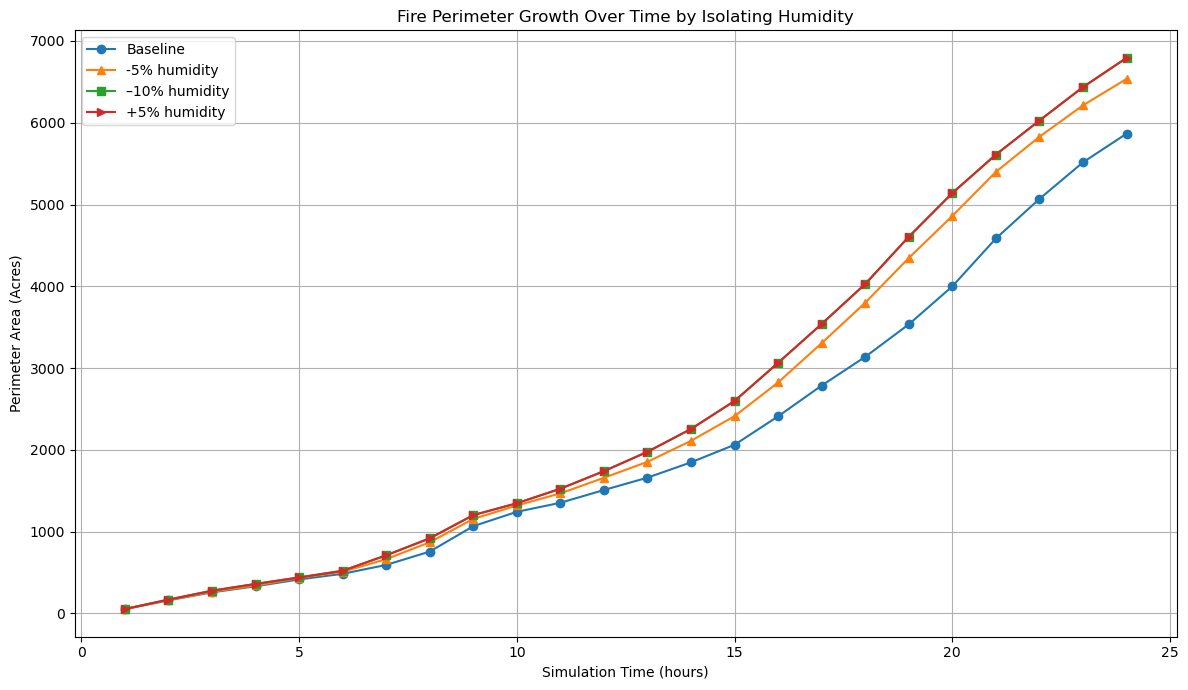

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
baseline_path = 'humidity_base.csv'
minus_5 = 'humidity_minus_5.csv'
minus_10 = '-10_Humidity.csv'
plus_5 = 'humidity_plus_5.csv'

# Load data
df_base = pd.read_csv(baseline_path)
df_minus_5 = pd.read_csv(minus_5)
df_minus_10 = pd.read_csv(minus_10)
df_plus_5 = pd.read_csv(plus_5)

# Drop rows with 0 perimeter area
df_base = df_base[df_base['Acres'] != 0]
df_minus_5 = df_minus_5[df_minus_5['Acres'] != 0]
df_minus_10 = df_minus_10[df_minus_10['Acres'] != 0]
df_plus_5 = df_plus_5[df_plus_5['Acres'] != 0]

# Convert SimTime from minutes to hours
df_base['SimHours'] = df_base['SimTime'] / 60
df_minus_5['SimHours'] = df_minus_5['SimTime'] / 60
df_minus_10['SimHours'] = df_minus_10['SimTime'] / 60
df_plus_5['SimHours'] = df_plus_5['SimTime'] / 60

# Plot all three scenarios
plt.figure(figsize=(12, 7))
plt.plot(df_base['SimHours'], df_base['Acres'], label='Baseline', marker='o')
plt.plot(df_minus_5['SimHours'], df_minus_5['Acres'], label='-5% humidity', marker='^')
plt.plot(df_minus_10['SimHours'], df_minus_10['Acres'], label='–10% humidity', marker='s')
plt.plot(df_plus_5['SimHours'], df_minus_10['Acres'], label = '+5% humidity', marker = '>')

# Chart formatting
plt.title('Fire Perimeter Growth Over Time by Isolating Humidity')
plt.xlabel('Simulation Time (hours)')
plt.ylabel('Perimeter Area (Acres)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

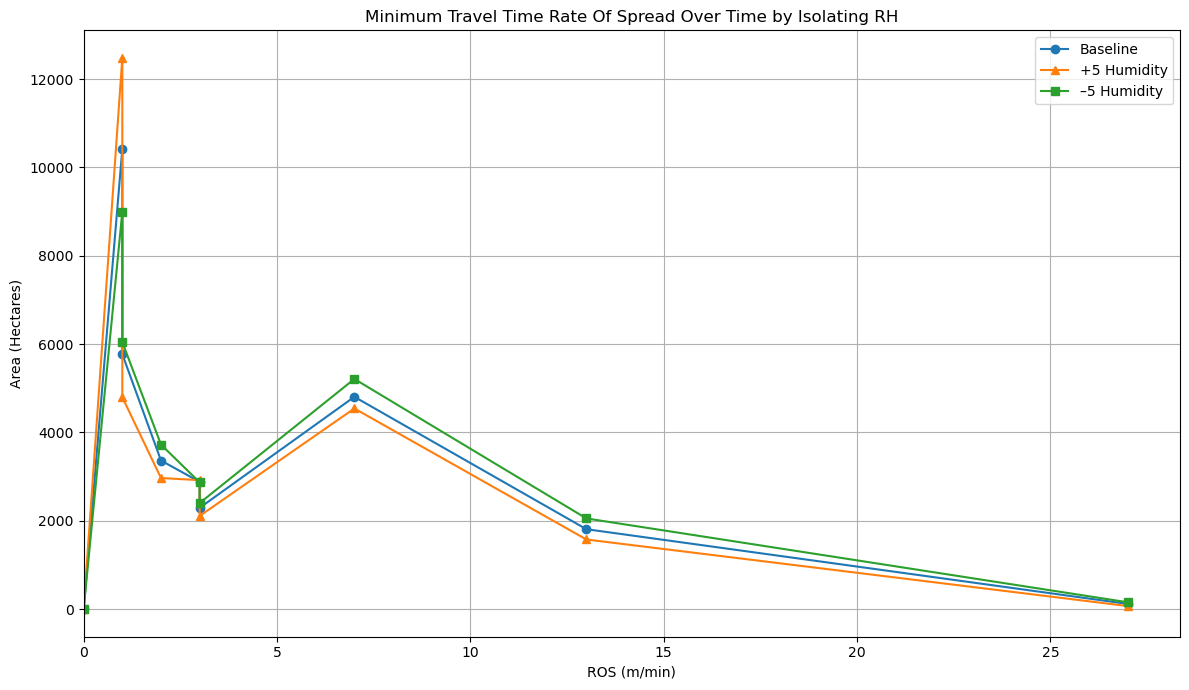

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
baseline_path = 'MTT_Rate_of_spread_BaselineHumdity.csv'
high_path = 'MTT_Rate_Of_SpreadHighHumidity.csv'
low_path = 'MTT_Rate_of_spreadLowHumidity.csv'

# Load and clean data
def load_and_clean(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    
    # Convert ROS to numeric, forcing errors (e.g., "No Data") to NaN, then drop those rows
    df['MTT ROS-m/min'] = pd.to_numeric(df['MTT ROS-m/min'], errors='coerce')
    df = df.dropna(subset=['MTT ROS-m/min'])
    
    # Optionally ensure sorted by ROS for clean plotting
    df = df.sort_values(by='MTT ROS-m/min')
    return df

df_base = load_and_clean(baseline_path)
df_high = load_and_clean(high_path)
df_low = load_and_clean(low_path)

# Plot all three scenarios
plt.figure(figsize=(12, 7))
plt.plot(df_base['MTT ROS-m/min'], df_base['Hectares'], label='Baseline', marker='o')
plt.plot(df_high['MTT ROS-m/min'], df_high['Hectares'], label='+5 Humidity', marker='^')
plt.plot(df_low['MTT ROS-m/min'], df_low['Hectares'], label='–5 Humidity', marker='s')

# Formatting
plt.title('Minimum Travel Time Rate Of Spread Over Time by Isolating RH')
plt.xlabel('ROS (m/min)')
plt.ylabel('Area (Hectares)')
plt.xlim(left=0)  # Force x-axis to start at 0
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


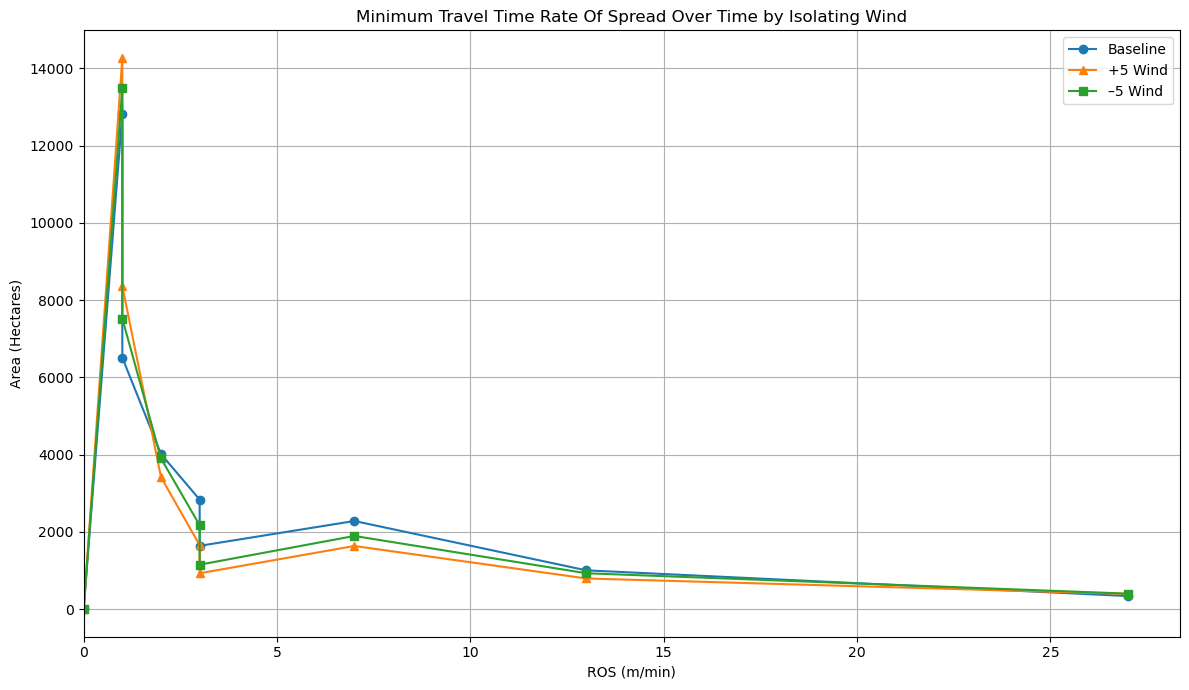

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
baseline_path = 'BaselineWindSpeedMTT.csv'
high_path = 'HighWindSpeedMTT.csv'
low_path = 'LowWindSpeedMTT.csv'

# Load and clean data
def load_and_clean(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    
    # Convert ROS to numeric, forcing errors (e.g., "No Data") to NaN, then drop those rows
    df['MTT ROS-m/min'] = pd.to_numeric(df['MTT ROS-m/min'], errors='coerce')
    df = df.dropna(subset=['MTT ROS-m/min'])
    
    # Optionally ensure sorted by ROS for clean plotting
    df = df.sort_values(by='MTT ROS-m/min')
    return df

df_base = load_and_clean(baseline_path)
df_high = load_and_clean(high_path)
df_low = load_and_clean(low_path)

# Plot all three scenarios
plt.figure(figsize=(12, 7))
plt.plot(df_base['MTT ROS-m/min'], df_base['Hectares'], label='Baseline', marker='o')
plt.plot(df_high['MTT ROS-m/min'], df_high['Hectares'], label='+5 Wind', marker='^')
plt.plot(df_low['MTT ROS-m/min'], df_low['Hectares'], label='–5 Wind', marker='s')

# Formatting
plt.title('Minimum Travel Time Rate Of Spread Over Time by Isolating Wind')
plt.xlabel('ROS (m/min)')
plt.ylabel('Area (Hectares)')
plt.xlim(left=0)  # Force x-axis to start at 0
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 